# 1.basic

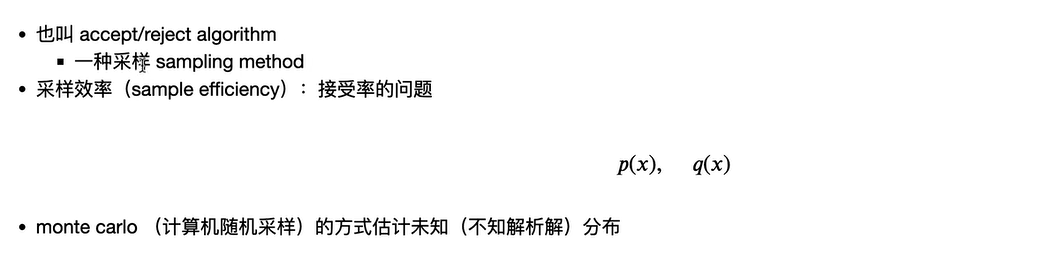

# 2.examples

## 2.1 $f(x)=1.2-x^4$

Wall time: 1.45 s


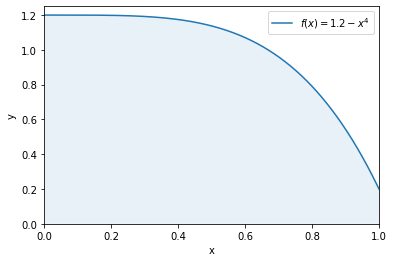

In [1]:
%%time
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1.2 - x**4

xs = np.linspace(0,1,1000)
ys = f(xs)

plt.plot(xs,ys,label="$f(x)=1.2-x^4$")
plt.fill_between(xs,ys,0,alpha=0.1)
plt.xlim(0,1)
plt.ylim(0,1.25)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

## 2.2 sample1

In [2]:
%%time
def sample(f,xmin=0,xmax=1,ymax=1.2):
    while True:
        x = np.random.uniform(low=xmin,high=xmax)
        y = np.random.uniform(low=0,high=ymax)
        if y<f(x):
            return x
samples = [sample(f,)for _ in range(100000)]

Wall time: 519 ms


Wall time: 46.6 ms


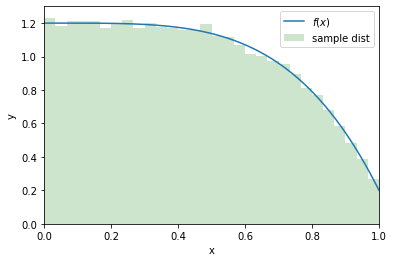

In [17]:
%%time
plt.plot(xs,ys,label='$f(x)$')
plt.hist(samples,density=True,alpha=.2,label='sample dist',color='green',bins=30)
plt.xlim(0,1)
plt.ylim(0,1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## 2.3 batch sample

In [3]:
def batch_sample(f,num_samples,xmin=0,xmax=1.,ymax=1.2,batch_size=1000):
    samples = []
    while len(samples)<num_samples:
        xs = np.random.uniform(low=xmin,high=xmax,size=batch_size)
        ys = np.random.uniform(low=0,high=ymax,size=batch_size)
        samples.extend(xs[ys<f(xs)].tolist())
        return samples[:num_samples]
samples1 = batch_sample(f,num_samples=10000)

Wall time: 24 ms


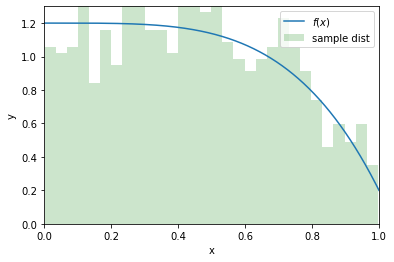

In [4]:
%%time
plt.plot(xs,ys,label='$f(x)$')
plt.hist(samples1,density=True,alpha=.2,label='sample dist',color='green',bins=30)
plt.xlim(0,1)
plt.ylim(0,1.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [8]:
%%time 
[sample(f) for i in range(10000)]


Wall time: 81.1 ms


[0.6974932412640326,
 0.8038613135628889,
 0.39044230885667364,
 0.3518469354574496,
 0.17827326275495603,
 0.8258082252513741,
 0.6876962905880802,
 0.5181345295494098,
 0.7155018284924682,
 0.5576619435442667,
 0.891284864197415,
 0.5844036315623508,
 0.1600642309931518,
 0.2877322290567854,
 0.2168578178615298,
 0.4019190400426227,
 0.7020674281212566,
 0.5550886469121058,
 0.4419968396767362,
 0.06454427027575083,
 0.1792636592182495,
 0.598607066000852,
 0.07458474732688303,
 0.6127728414808951,
 0.3386889933955305,
 0.7062720975151616,
 0.32502634076651404,
 0.6966224359930394,
 0.23999312219976265,
 0.19467915512035072,
 0.5106136573157296,
 0.4256647946033103,
 0.15901484313910108,
 0.6279839649257785,
 0.19178605012886674,
 0.06948311897561654,
 0.1410370395292645,
 0.875141742316634,
 0.4926466502062604,
 0.012595795760601658,
 0.6168399382201357,
 0.13561727625896336,
 0.6667094388851541,
 0.6393243323791971,
 0.5175808790177752,
 0.35567194073889463,
 0.18706321810037052,
 

In [9]:
%%time
batch_sample(f,10000)

Wall time: 2 ms


[0.6775262876040301,
 0.07358534089896773,
 0.557333061241907,
 0.14543191793805166,
 0.5788712502847692,
 0.26793759630988656,
 0.5484400390683253,
 0.5368991972206216,
 0.33629627503512594,
 0.5341913308392696,
 0.2573806830882156,
 0.42656023630250484,
 0.9731120950331976,
 0.4131036256857876,
 0.16865291884347633,
 0.8109817757103217,
 0.7168051436580697,
 0.2570224954928413,
 0.23034559206619787,
 0.1771379289805025,
 0.6881132735760093,
 0.5043591646736811,
 0.191996800769896,
 0.2391038677434325,
 0.21888870067001864,
 0.18399632192735105,
 0.6916257467372988,
 0.24365521393547263,
 0.14127485441228071,
 0.623176594022571,
 0.32552417632805775,
 0.16664659549402305,
 0.8825438191240413,
 0.28938802106311146,
 0.6503602442858692,
 0.30440043083658863,
 0.5872847942709848,
 0.1078351030977126,
 0.6295049821915358,
 0.4896567713913219,
 0.6727849845041379,
 0.8132063252663606,
 0.04363384761336142,
 0.8364740304855106,
 0.7441076521394574,
 0.14345307309070277,
 0.12409143995154737

## 2.4 sample efficiency

$$f(x)=e^{-\pi x^2}$$

(Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)'))

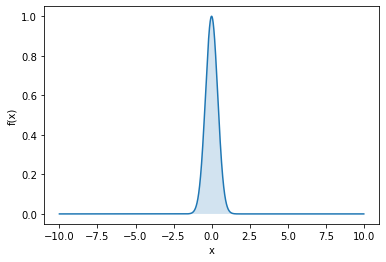

In [14]:
gauss = lambda x:np.exp(-np.pi*x**2)
xs = np.linspace(-10,10,10000)
ys = gauss(xs)
plt.plot(xs,ys)
plt.fill_between(xs,ys,0,alpha=0.2)
plt.xlabel("x"),plt.ylabel("f(x)")

In [15]:
def batch_sample(f,num_samples,xmin=-10,xmax=10,ymax=1):
    x = np.random.uniform(low=xmin,high=xmax,size=num_samples)#生成num_samples个随机x值
    y = np.random.uniform(low=0,high=ymax,size=num_samples)   #生成num_samples个随机y值
    passed = (y < f(x)).astype(int)                           #记录y<f(x)的个数，astype指定输出数据类型
    return x,y,passed

In [16]:
samples_xs,samples_ys,passed = batch_sample(gauss,10000)

In [17]:
sum(passed)/10000                      #样本中满足条件的占比

0.0506

Wall time: 23 ms


Text(0.5, 1.0, 'reject sampling efficiency:5.06%')

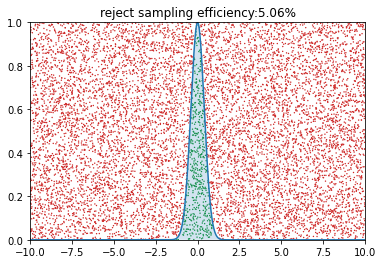

In [20]:
%%time
plt.plot(xs,ys)
plt.fill_between(xs,ys,alpha = 0.2)
plt.scatter(samples_xs,samples_ys,c=passed,cmap='RdYlGn',vmin=-0.1,vmax=1.1,lw=0,s=2)
plt.xlim(-10,10)
plt.ylim(0,1)
plt.title(f'reject sampling efficiency:{sum(passed)/10000:.2%}')

In [25]:
%%time
from scipy.integrate import quad
quad(gauss,-10,10)[0]/(20*1)     #quad 积分函数，从数学上验证该积分值

Wall time: 1 ms


0.04999999999999999